In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')




In [7]:
df1 = pd.read_csv("./raw_data2.csv", encoding='cp949')
# df1.info()
df1 = df1.replace(',', '')
df1['달러원종가'] = pd.to_numeric(df1['달러원종가'], errors='ignore')
df1['달러원시가'] = pd.to_numeric(df1['달러원시가'], errors='ignore')
df1['달러인덱스'] = pd.to_numeric(df1['달러인덱스'], errors='ignore')

In [8]:
# df2 =pd.merge(df1,df,how='inner',on='날짜')
df2=pd.read_csv("./raw_data_joo.csv",encoding='euc-kr')
df2['달러원종가'] = df2['달러원종가'].replace(',', '')
df2['달러원시가'] = df2['달러원시가'].replace(',', '')

# df2.info()

# df2['달러원시가']=df2['달러원시가'].astype('float')
df2['콜금리']=df2['콜금리'].astype('float')

# df2['달러인덱스']=df2['달러인덱스'].astype('float')
# df2['BIR']=df2['BIR'].astype('float')

for i in df2.index:
    if df2.loc[i,'달러인덱스'] == '.':
        df2.loc[i,'달러인덱스'] = np.nan

for i in df2.index:
    if df2.loc[i,'BIR'] == '.':
        df2.loc[i,'BIR'] = np.nan

df2.isna().sum()

날짜        0
달러원종가     0
달러원시가     0
CD91      0
WTI가      0
달러위안화     0
달러엔       0
달러인덱스    91
유로달러      0
유로인덱스     0
콜금리       0
코스피종가     1
BIR      64
dtype: int64

In [9]:
# df2['콜금리']=df2['콜금리'].astype('float')

df2['달러인덱스']=df2['달러인덱스'].astype('float')
df2['달러인덱스'] = df2['달러인덱스'].fillna(method='bfill')

df2['BIR']=df2['BIR'].astype('float')
df2['BIR'] = df2['BIR'].fillna(method='bfill')
df2['코스피종가'] = df2['코스피종가'].fillna(method='bfill')

#df2['달러원시가']=df2['달러원시가'].astype('float')
# df2['달러원종가']=df2['달러원종가'].astype('float')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318 entries, 0 to 3317
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      3318 non-null   object 
 1   달러원종가   3318 non-null   object 
 2   달러원시가   3318 non-null   object 
 3   CD91    3318 non-null   float64
 4   WTI가    3318 non-null   float64
 5   달러위안화   3318 non-null   float64
 6   달러엔     3318 non-null   float64
 7   달러인덱스   3318 non-null   float64
 8   유로달러    3318 non-null   float64
 9   유로인덱스   3318 non-null   float64
 10  콜금리     3318 non-null   float64
 11  코스피종가   3318 non-null   float64
 12  BIR     3318 non-null   float64
dtypes: float64(10), object(3)
memory usage: 337.1+ KB


<Axes: >

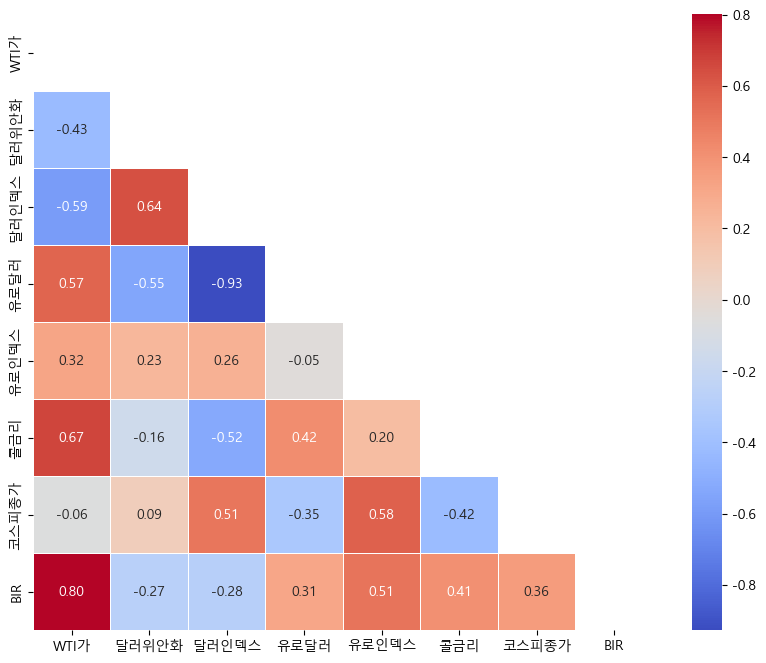

In [10]:
# 다중공정성으로 CD 91물, 달러엔 제외 
corr_data = df2[[ '달러원시가','WTI가', '달러위안화',  '달러인덱스', '유로달러',
       '유로인덱스', '콜금리', '코스피종가', 'BIR']].corr()
plt.figure(figsize=(10, 8))

mask = np.triu(np.ones_like(corr_data, dtype=bool))

sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', mask=mask)



In [14]:
corr_data = df2[[ '달러원종가','CD91', 'WTI가', '달러위안화', '달러엔', '달러인덱스', '유로달러',
       '유로인덱스', '콜금리', '코스피종가', 'BIR']]

# np.abs(corr_data.corr()['달러원종가']).sort_values(ascending=False)
corr_data



,달러원종가,CD91,WTI가,달러위안화,달러엔,달러인덱스,유로달러,유로인덱스,콜금리,코스피종가,BIR
0,"1,150.00",2.88,81.64,6.8285,92.47,92.3566,1.4413,106.23,1.980,1696.140015,2.38
1,"1,140.20",2.88,81.47,6.8268,91.58,92.2236,1.4369,105.82,1.980,1690.619995,2.34
2,"1,129.20",2.88,83.25,6.8278,92.38,92.0941,1.4413,106.11,1.960,1705.319946,2.37
3,"1,138.20",2.88,82.69,6.8281,93.45,92.3684,1.4318,105.84,1.990,1683.449951,2.41
4,"1,128.25",2.88,82.91,6.8276,92.68,92.1485,1.4413,106.18,2.000,1695.260010,2.42
...,...,...,...,...,...,...,...,...,...,...,...
3313,"1,325.49",3.72,87.42,7.2882,146.58,121.8185,1.0748,124.19,3.602,2556.879883,2.35
3314,"1,326.15",3.73,88.94,7.2910,147.08,121.7721,1.0752,124.21,3.597,2536.580078,2.34
3315,"1,326.59",3.75,88.80,7.2700,147.45,121.5454,1.0728,124.25,3.592,2534.699951,2.35
3316,"1,329.52",3.76,90.67,7.2770,147.47,121.7192,1.0641,124.19,3.587,2572.889893,2.34


In [16]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(corr_data)
minmax_scaled_data = minmax_scaler.transform(corr_data)
minmax_scaled_df = pd.DataFrame(data=minmax_scaled_data, columns=corr_data.columns )
minmax_scaled_df
#weight: [ 0.64370901  0.10700292  0.09796693 -0.20526548 -0.20020532 -0.96229982
#  0.52975346 -0.57378928 -0.2077806  -0.13615201]
# bias: 0.8062781292603675
# 선형회귀 모델 R2: 0.86

ValueError: could not convert string to float: '1,150.00'

In [ ]:
# from sklearn.preprocessing import StandardScaler

# Standard_Scaler = StandardScaler()
# Standard_Scaler.fit(corr_data)
# Standard_Scaled_data = Standard_Scaler.transform(corr_data)
# Standard_Scaled_df = pd.DataFrame(data=Standard_Scaled_data, columns=corr_data.columns)
# Standard_Scaled_df.describe()

# weight: [ 1.03691204  0.12470911  0.13843903 -0.27187524 -0.31934538 -1.24699102
#  0.67207078 -0.88829846 -0.24143534 -0.11441595]
# bias: 0.0013727852680168876
# 선형회귀 모델 R2: 0.86

In [ ]:
from sklearn.model_selection import train_test_split
y= corr_data['달러원종가']
X=minmax_scaled_df


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# R2값이 1이 되는게 맞는것일까??? 
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('weight:', lr_model.coef_)
print('bias:', lr_model.intercept_)

score =lr_model.score(X_test, y_test)
print('선형회귀 모델 R2: {0:.2f}'.format(score))

weight: [ 4.35380000e+02  2.02508306e-13 -2.91146568e-13 -1.55186751e-13
 -3.28794685e-13 -5.74071876e-14 -1.01671640e-13 -2.48652915e-13
  9.87015629e-14  3.38451324e-13  8.11143075e-14]
bias: 1009.2500000000001
선형회귀 모델 R2: 1.00


In [ ]:
# Cofficient 값을 버리고, 부호만 살리는건 어때요??
coef=pd.Series(data=np.round(lr_model.coef_,1), index=X.columns)
coef

달러원종가    435.4
CD91       0.0
WTI가      -0.0
달러위안화     -0.0
달러엔       -0.0
달러인덱스     -0.0
유로달러      -0.0
유로인덱스     -0.0
콜금리        0.0
코스피종가      0.0
BIR        0.0
dtype: float64

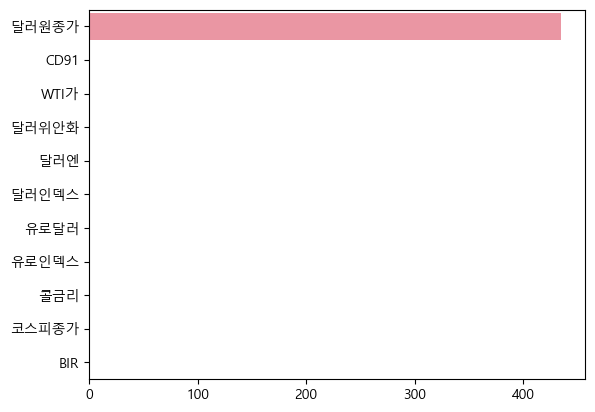

In [ ]:
# 이 시각화는 왜 이모냥인겁니까?? 
coef_sort=coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    r2=r2_score(y_test, y_pred)
    print('MSE:{0:3f}, RMSE:{1:.3f}, r2:{2:.3f}'.format(mse,rmse,r2))

y_pred=lr_model.predict(X_test)
printRegressorResult(y_test,y_pred)

MSE:0.000000, RMSE:0.000, r2:1.000


In [ ]:
result=pd.DataFrame({'y':y_test.values,'y_pred':y_pred, 'diff':np.abs(y_test.values-y_pred)})
result.sort_values(by=['diff'], ascending=False)

,y,y_pred,diff
110,1424.48,1424.48,4.547474e-13
704,1291.54,1291.54,4.547474e-13
603,1439.96,1439.96,4.547474e-13
965,1286.31,1286.31,4.547474e-13
567,1328.46,1328.46,4.547474e-13
...,...,...,...
394,1102.40,1102.40,0.000000e+00
395,1024.75,1024.75,0.000000e+00
398,1131.12,1131.12,0.000000e+00
399,1113.76,1113.76,0.000000e+00


In [ ]:
# 에측결과 시각화, 왜 에러가 날까요??
y_pred = lr_model.predict(X_test)
lr_df = pd.DataFrame(data={'Y':y_test, 'Y_pred(lr)':y_pred,'diff(lr)':np.round(np.abs(y_test-y_pred),2)})
sns.lineplot(data=lr_df)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- BIR
- CD91
- WTI가
- 달러원종가
- 유로인덱스
- ...


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

score=tree_model.score(X_test,y_test)
print('의사결정나무 R2: {0:.2f}'.format(score))

의사결정나무 R2: 0.97


In [ ]:
y_pred = tree_model.predict(X_test)

tree_df = pd.DataFrame(data = {'Y': y_test, 'Y_pred(tree)':y_pred, 'diff(tree)':np.round(np.abs(y_test-y_pred),2)} )
tree_df.sort_values(by=['diff(tree)'],ascending=False).head(10)

,Y,Y_pred(tree),diff(tree)
818,1114.05,1019.10,94.95
817,1111.50,1019.10,92.40
1392,1123.04,1196.76,73.72
2825,1170.23,1103.42,66.81
109,1211.50,1146.50,65.00
1391,1137.01,1199.48,62.47
1557,1171.95,1117.00,54.95
2030,1109.98,1160.81,50.83
1364,1180.05,1132.06,47.99
100,1199.00,1153.25,45.75


<Axes: >

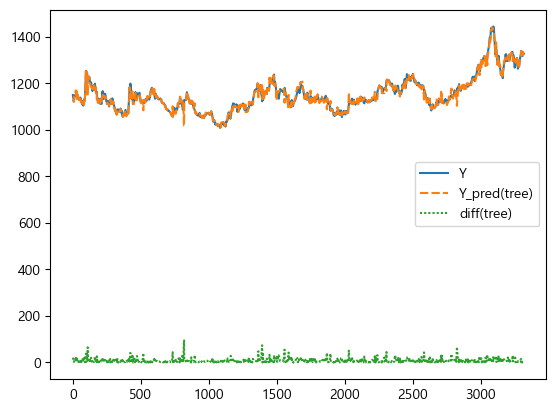

In [ ]:
# 이거 PPT 에 사용하면 좋겠슴당!! 
sns.lineplot(data=tree_df)

In [ ]:
!pip install xgboost

                                              0.0/99.7 MB ? eta -:--:--
                                              0.1/99.7 MB 2.8 MB/s eta 0:00:36
                                              0.3/99.7 MB 3.5 MB/s eta 0:00:29
                                              0.5/99.7 MB 4.0 MB/s eta 0:00:25
                                              0.7/99.7 MB 4.1 MB/s eta 0:00:25
                                              0.7/99.7 MB 3.4 MB/s eta 0:00:30
                                              0.9/99.7 MB 3.5 MB/s eta 0:00:29
                                              1.1/99.7 MB 3.4 MB/s eta 0:00:30
                                              1.1/99.7 MB 3.1 MB/s eta 0:00:32
                                              1.2/99.7 MB 2.9 MB/s eta 0:00:34
                                              1.4/99.7 MB 3.0 MB/s eta 0:00:34
                                              1.6/99.7 MB 3.1 MB/s eta 0:00:32
                                              1.7/99.7 MB 3


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
### 이거 해석 부탁드립니당! 
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

model_list = [forest_model, lgb_model, xgb_model]

for model in model_list:
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_name = model.__class__,__name__
    print('{0} 모델 R2: {1:.2f}'.format(model_name,score))


(<class 'sklearn.ensemble._forest.RandomForestRegressor'>, '__main__') 모델 R2: 0.98
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 2322, number of used features: 4
[LightGBM] [Info] Start training from score 1150.589710
(<class 'lightgbm.sklearn.LGBMRegressor'>, '__main__') 모델 R2: 0.98
(<class 'xgboost.sklearn.XGBRegressor'>, '__main__') 모델 R2: 0.98


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

X_selected=SelectKBest(score_func= f_regression, k=5)
X_selected.fit_transform(X,y)
features = X.columns[X_selected.get_support()]
print('features={}'.format(features))

corr_features = corr_data[['달러위안화', '달러엔', '달러인덱스', '유로달러']]

features=Index(['달러원종가', '달러위안화', '달러엔', '달러인덱스', '유로달러'], dtype='object')


In [ ]:
X_selected=corr_features
X_train, X_test, y_train, y_test= train_test_split(X_selected,y,test_size=0.3, random_state=42)
lr_model2=LinearRegression()
lr_model2.fit(X_train, y_train)

y_pred = lr_model2.predict(X_test)
printRegressorResult(y_test,y_pred)

# 왜 점수가 요렇게 나오까요? 

MSE:2157.156301, RMSE:46.445, r2:0.609


In [ ]:
# polynomialFeatures() 사용하여 2차원 다항회귀모델

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_selected)
X_train, X_test, y_train, y_test=train_test_split(X_poly, y, test_size=0.3, random_state=42)

poly_model=LinearRegression()
poly_model.fit(X_train, y_train)

y_pred = poly_model.predict(X_test)
printRegressorResult(y_test, y_pred)

MSE:976.555848, RMSE:31.250, r2:0.823


In [ ]:
# 데이터 전처리 

from sklearn.preprocessing import StandardScaler
X_selected_scaled = StandardScaler().fit_transform(X_selected)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

lr_model3=LinearRegression()
lr_model3.fit(X_train, y_train)

y_pred = lr_model3.predict(X_test)
printRegressorResult(y_test,y_pred)

MSE:1646.147009, RMSE:40.573, r2:0.701


달러위안화    0.234943
달러엔      0.093620
유로달러     0.421272
콜금리      0.177295
dtype: float64


KeyError: '0,'

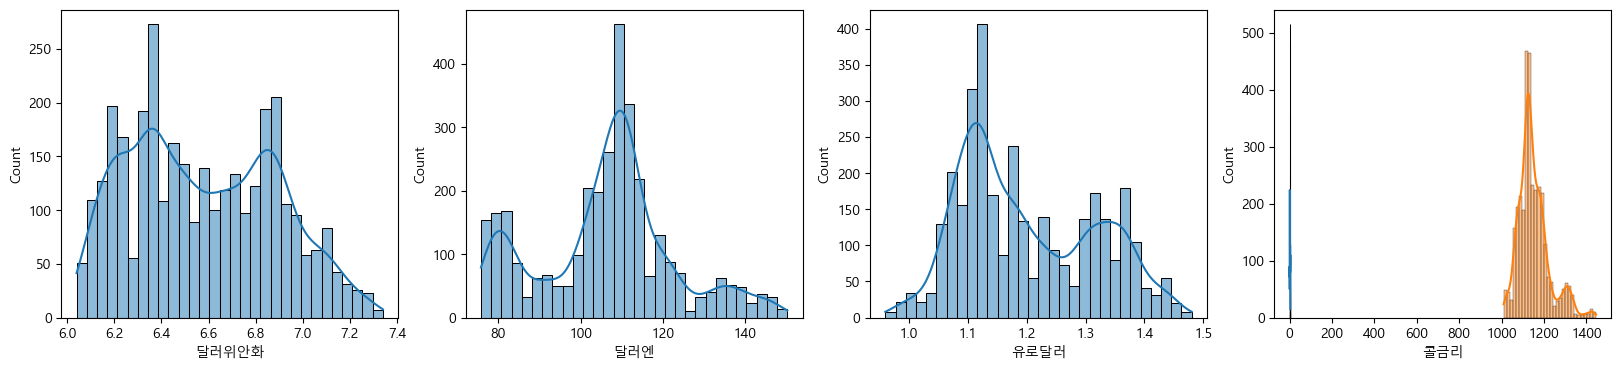

In [ ]:
# 데이터 분포 확인- 히스토그램 
nrows=1
ncols=4

fig,axs=plt.subplots(nrows, ncols)
fig.set_size_inches(20,4)

sns.histplot(x=X_selected.columns[0], data=X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x=X_selected.columns[1], data=X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x=X_selected.columns[2], data=X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x=X_selected.columns[3], data=X_selected, kde=True, bins=30, ax=axs[3])


sns.histplot(x=y, data=y, kde=True, bins=30, ax=axs[3])

print(X_selected.skew())
print('\n달러원종가:{0,.2f}'.format(y.skew()))

달러위안화    0.234943
달러엔      0.093620
유로달러     0.352059
콜금리      0.177295
dtype: float64

달러원종가:0.93


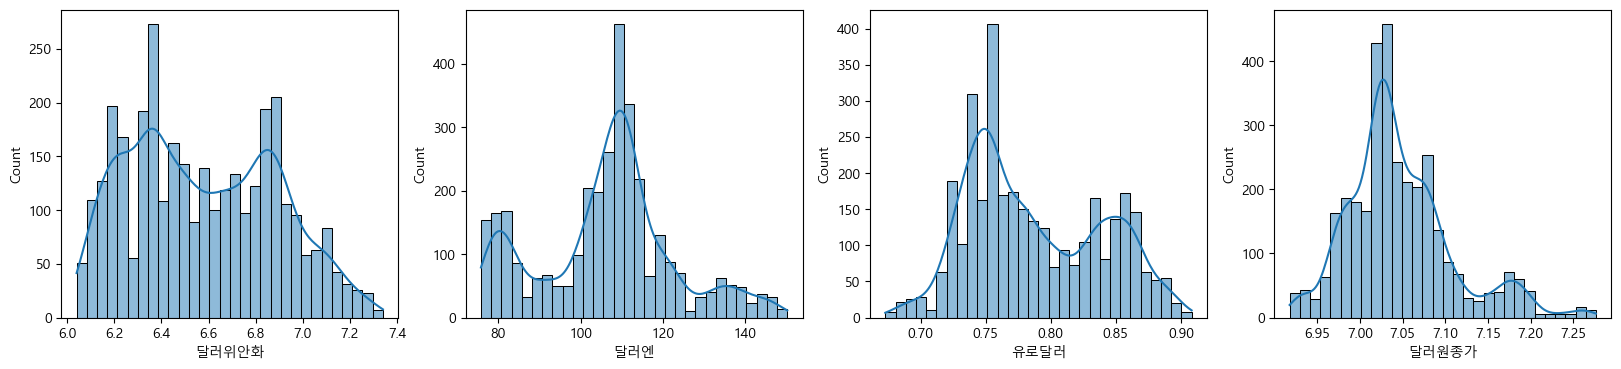

In [ ]:
# 로그연산 유로달러 해보기 
X_selected['유로달러']=np.log1p(X_selected['유로달러'])
y=np.log1p(y)

# 데이터분포확인 - 히스토그램 
nrows=1
ncols=4

fig, axs=plt.subplots(nrows, ncols)
fig.set_size_inches(20,4)

sns.histplot(x=X_selected.columns[0], data=X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x=X_selected.columns[1], data=X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x=X_selected.columns[2], data=X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x=y, data=y, kde=True, bins=30, ax=axs[3])

print(X_selected.skew())
print('\n달러원종가:{0:.2f}'.format(y.skew()))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected,y,test_size=0.3, random_state=42)

lr_model4= LinearRegression()
lr_model4.fit(X_train, y_train)

y_pred= lr_model4.predict(X_test)
mse=mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
rmse=np.sqrt(mse)
r2=r2_score(np.expm1(y_test), np.expm1(y_pred))
print('MSE : {0:.3f}, RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse, rmse, r2))

MSE : 1614.049, RMSE : 40.175, r2 : 0.707


In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr_model, X, y, scoring='neg_mean_squared_error', cv=3, return_train_score=True, return_estimator=True)
print('Scores', scores)

mse=(-1*scores['train_score'])
print('MSE:', mse)

rmse=np.sqrt(-1*scores['train_score'])
print('RMSE:', rmse)

print('RMSE 평균:{0:.3f}'.format(np.mean(rmse)))

Scores {'fit_time': array([0.0054152 , 0.00298691, 0.00299025]), 'score_time': array([0.00422096, 0.00099564, 0.0010047 ]), 'estimator': [LinearRegression(), LinearRegression(), LinearRegression()], 'test_score': array([-0.01504937, -0.00102649, -0.01246945]), 'train_score': array([-0.00036306, -0.00043051, -0.00049963])}
MSE: [0.00036306 0.00043051 0.00049963]
RMSE: [0.01905409 0.02074885 0.02235238]
RMSE 평균:0.021


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
!pip install lightgbm


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/1.3 MB ? eta -:--:--
     ---------------                          0.5/1.3 MB 15.9 MB/s eta 0:00:01
     --------------------------------         1.1/1.3 MB 13.7 MB/s eta 0:00:01
     ---------------------------------------- 1.3/1.3 MB 12.0 MB/s eta 0:00:00


In [ ]:
from lightgbm import LGBMRegressor

lgb_model=LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 2322, number of used features: 4
[LightGBM] [Info] Start training from score 7.046986


LGBMRegressor(random_state=42)

In [ ]:
model_list=[lr_model, forest_model, lgb_model]

for model in model_list:
    model.fit(X_train, y_train)
    y_preds=model.predict(X_test)
    mse=mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    r2=r2_score(y_test, y_preds)
    model_name=model.__class__.__name__
    print('{0} MSE:{1:.3f}, RMSE:{2:.3f}, r2:{3:.3f}'.format(model_name, mse, rmse,r2))

LinearRegression MSE:0.001, RMSE:0.035, r2:0.695
RandomForestRegressor MSE:0.000, RMSE:0.010, r2:0.975
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 2322, number of used features: 4
[LightGBM] [Info] Start training from score 7.046986
LGBMRegressor MSE:0.000, RMSE:0.011, r2:0.970


## 월데이터 ML 해보기 

In [ ]:
df_m= pd.read_csv("../ml/datasets/해커톤/raw_data_m.csv", encoding='euc-kr')    

df_m.columns
